# Regularization methods 

In [1]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Data Preparation

In [2]:
# ƒê·ªçc file 'DWD.csv' b·∫±ng th∆∞ vi·ªán pandas
dwd = pd.read_csv("DWD.csv")

In [6]:
# In c√°c c·ªôt trong dataframe
dwd.columns

Index(['ID', 'DWD_ID', 'STATION_NAME', 'FEDERAL_STATE', 'LAT', 'LON',
       'ALTITUDE', 'PERIOD', 'RECORD_LENGTH', 'MEAN_ANNUAL_AIR_TEMP',
       'MEAN_MONTHLY_MAX_TEMP', 'MEAN_MONTHLY_MIN_TEMP',
       'MEAN_ANNUAL_WIND_SPEED', 'MEAN_CLOUD_COVER', 'MEAN_ANNUAL_SUNSHINE',
       'MEAN_ANNUAL_RAINFALL', 'MAX_MONTHLY_WIND_SPEED', 'MAX_AIR_TEMP',
       'MAX_WIND_SPEED', 'MAX_RAINFALL', 'MIN_AIR_TEMP',
       'MEAN_RANGE_AIR_TEMP'],
      dtype='object')

In [4]:
# In th√¥ng tin c·ªßa dataframe (b·∫±ng 'info()')
dwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      599 non-null    int64  
 1   DWD_ID                  599 non-null    int64  
 2   STATION_NAME            599 non-null    object 
 3   FEDERAL_STATE           599 non-null    object 
 4   LAT                     599 non-null    float64
 5   LON                     599 non-null    float64
 6   ALTITUDE                599 non-null    float64
 7   PERIOD                  599 non-null    object 
 8   RECORD_LENGTH           599 non-null    int64  
 9   MEAN_ANNUAL_AIR_TEMP    598 non-null    float64
 10  MEAN_MONTHLY_MAX_TEMP   597 non-null    float64
 11  MEAN_MONTHLY_MIN_TEMP   595 non-null    float64
 12  MEAN_ANNUAL_WIND_SPEED  588 non-null    float64
 13  MEAN_CLOUD_COVER        588 non-null    float64
 14  MEAN_ANNUAL_SUNSHINE    406 non-null    fl

In [10]:
# ƒê·ªÉ bi·∫øt c·ªôt n√†o kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn d·ª± ƒëo√°n l∆∞·ª£ng m∆∞a trung b√¨nh h·∫±ng nƒÉm, ta t√≠nh ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c feature:

# L·ªçc ra c√°c c·ªôt kh√¥ng ph·∫£i l√† 'MEAN_ANNUAL_RAINFALL'
non_target_columns = dwd.columns[dwd.columns != 'MEAN_ANNUAL_RAINFALL']

# Chuy·ªÉn ki·ªÉu d·ªØ li·ªáu string sang int (cho c√°c c·ªôt station_name, federal_state)
dwd[non_target_columns] = dwd[non_target_columns].apply(pd.to_numeric, errors='coerce')

# X√≥a c√°c d√≤ng c√≥ gi√° tr·ªã thi·∫øu trong c·ªôt 'MEAN_ANNUAL_RAINFALL' ƒë·ªÉ tr√°nh b·ªã l·ªói khi t√≠nh to√°n
dwd = dwd.dropna(subset=['MEAN_ANNUAL_RAINFALL'])

# T√≠nh to√°n ma tr·∫≠n t∆∞∆°ng quan
correlation_matrix = dwd[non_target_columns].corrwith(dwd['MEAN_ANNUAL_RAINFALL'])

# In ra ma tr·∫≠n t∆∞∆°ng quan ƒë·ªÉ xem m·ª©c ƒë·ªô t∆∞∆°ng quan c·ªßa t·ª´ng c·ªôt v·ªõi 'MEAN_ANNUAL_RAINFALL'
print(correlation_matrix)

ID                        0.075860
DWD_ID                    0.072759
STATION_NAME                   NaN
FEDERAL_STATE                  NaN
LAT                      -0.439290
LON                      -0.152795
ALTITUDE                  0.709002
PERIOD                         NaN
RECORD_LENGTH            -0.065195
MEAN_ANNUAL_AIR_TEMP     -0.539133
MEAN_MONTHLY_MAX_TEMP    -0.439943
MEAN_MONTHLY_MIN_TEMP    -0.445130
MEAN_ANNUAL_WIND_SPEED    0.011600
MEAN_CLOUD_COVER          0.081362
MEAN_ANNUAL_SUNSHINE      0.026481
MAX_MONTHLY_WIND_SPEED    0.017099
MAX_AIR_TEMP             -0.509815
MAX_WIND_SPEED            0.292522
MAX_RAINFALL              0.863788
MIN_AIR_TEMP             -0.186723
MEAN_RANGE_AIR_TEMP      -0.122783
dtype: float64


In [13]:
# Lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt trong vi·ªác d·ª± ƒëo√°n l∆∞·ª£ng m∆∞a trung b√¨nh h·∫±ng nƒÉm
# C√°c c·ªôt kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn d·ª± ƒëo√°n l∆∞·ª£ng m∆∞a trung b√¨nh h·∫±ng nƒÉm l√†: ID, DWD_ID, STATION_NAME, FEDERAL_STATE, PERIOD, RECORD_LENGTH)
df = dwd.drop(['ID','DWD_ID','STATION_NAME','FEDERAL_STATE','PERIOD','RECORD_LENGTH'], axis=1).dropna()

# Hi·ªÉn th·ªã c√°c gi√° tr·ªã ƒë·∫ßu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 596
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LAT                     204 non-null    float64
 1   LON                     204 non-null    float64
 2   ALTITUDE                204 non-null    float64
 3   MEAN_ANNUAL_AIR_TEMP    204 non-null    float64
 4   MEAN_MONTHLY_MAX_TEMP   204 non-null    float64
 5   MEAN_MONTHLY_MIN_TEMP   204 non-null    float64
 6   MEAN_ANNUAL_WIND_SPEED  204 non-null    float64
 7   MEAN_CLOUD_COVER        204 non-null    float64
 8   MEAN_ANNUAL_SUNSHINE    204 non-null    float64
 9   MEAN_ANNUAL_RAINFALL    204 non-null    float64
 10  MAX_MONTHLY_WIND_SPEED  204 non-null    float64
 11  MAX_AIR_TEMP            204 non-null    float64
 12  MAX_WIND_SPEED          204 non-null    float64
 13  MAX_RAINFALL            204 non-null    float64
 14  MIN_AIR_TEMP            204 non-null    float64

In [18]:
# T·∫°o ra m·ªôt DataFrame m·ªõi X b·∫±ng c√°ch lo·∫°i b·ªè c·ªôt 'MEAN_ANNUAL_RAINFALL' t·ª´ DataFrame g·ªëc df
X = df.drop(columns=['MEAN_ANNUAL_RAINFALL'])
# T·∫°o ra m·ªôt Series m·ªõi y b·∫±ng c√°ch ch·ªçn c·ªôt 'MEAN_ANNUAL_RAINFALL' l√† bi·∫øn m·ª•c ti√™u c·∫ßn d·ª± ƒëo√°n.
y = df['MEAN_ANNUAL_RAINFALL']
# Kh·ªüi t·∫°o ƒë·ªëi t∆∞·ª£ng scaler t·ª´ l·ªõp StandardScaler() trong th∆∞ vi·ªán sklearn.preprocessing. 
scaler =  StandardScaler()
# Chia d·ªØ li·ªáu th√†nh hai t·∫≠p: T·∫≠p hu·∫•n luy·ªán (X_train, y_train) v√† T·∫≠p ki·ªÉm tra (X_test, y_test). 
# ƒê·∫∑t random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Chu·∫©n h√≥a d·ªØ li·ªáu hu·∫•n luy·ªán b·∫±ng c√°ch s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p fit_transform() t·ª´ ƒë·ªëi t∆∞·ª£ng scaler ƒë√£ ƒë∆∞·ª£c kh·ªüi t·∫°o tr∆∞·ªõc ƒë√≥
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ƒê·ªçc d·ªØ li·ªáu t·ª´ file feather 'rmses.feather'. 
# Ch·ªâ s·ªë c·ªßa DataFrame ƒë∆∞·ª£c thi·∫øt l·∫≠p l√† c·ªôt 'index'.
rmses = pd.read_feather('rmses.feather').set_index('index')
rmses

name  train_RMSE   test_RMSE
index                                              
0            baseline model  243.882152  180.877011
0          simple alt model  154.992815  138.854544
0        max rainfall model  119.953630  117.437897
0      multi alt rain model  118.095746  113.746363
4             forward model   87.392377  117.884639
5            backward model   87.236023  118.367974
6         mlxtend SFS model   91.976905   91.232370

## Ridge regression 

T√≠nh to√°n h·ªá s·ªë cho $\alpha \in \left[10^{-1}, 10^5\right]$ b·∫±ng ph∆∞∆°ng ph√°p ridge regression v√† v·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£.

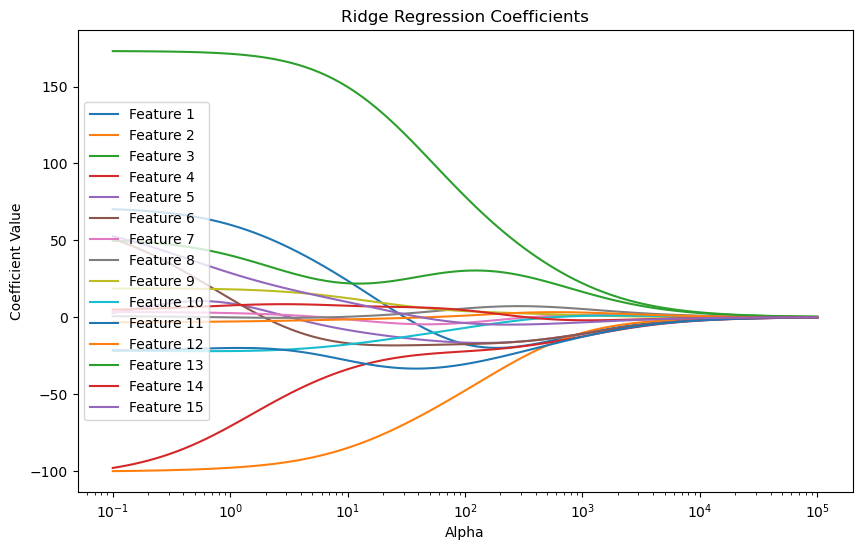

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Kh·ªüi t·∫°o gi√° tr·ªã alpha t·ª´ 10^-1 ƒë·∫øn 10^5
alphas = np.logspace(-1, 5, num=100)

# Kh·ªüi t·∫°o c√°c m·∫£ng ƒë·ªÉ l∆∞u tr·ªØ h·ªá s·ªë c·ªßa c√°c bi·∫øn
coefs = []

# Chu·∫©n h√≥a d·ªØ li·ªáu hu·∫•n luy·ªán
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Hu·∫•n luy·ªán m√¥ h√¨nh Ridge Regression v·ªõi c√°c gi√° tr·ªã alpha kh√°c nhau v√† l∆∞u tr·ªØ h·ªá s·ªë t∆∞∆°ng ·ª©ng
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
plt.figure(figsize=(10, 6))

for i in range(X_train.shape[1]):
    plt.plot(alphas, [coef[i] for coef in coefs], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.legend()
plt.show()


Xem x√©t s·ª± kh√°c bi·ªát c·ªßa h·ªá s·ªë ƒë·ªëi v·ªõi c√°c h·ªìi quy tuy·∫øn t√≠nh ƒë∆°n gi·∫£n cho t·ª´ng tham s·ªë. ƒê·ªÉ ƒë·∫°t ƒë∆∞·ª£c m·ª•c ƒë√≠ch n√†y, ch√∫ng ta s·∫Ω t√≠nh to√°n c√°c h·ªá s·ªë h·ªìi quy tuy·∫øn t√≠nh ƒë∆°n gi·∫£n `reg_coeff` v√† t√≠nh sai s·ªë b√¨nh ph∆∞∆°ng trung b√¨nh v√† v·∫Ω ƒë·ªì th·ªã.

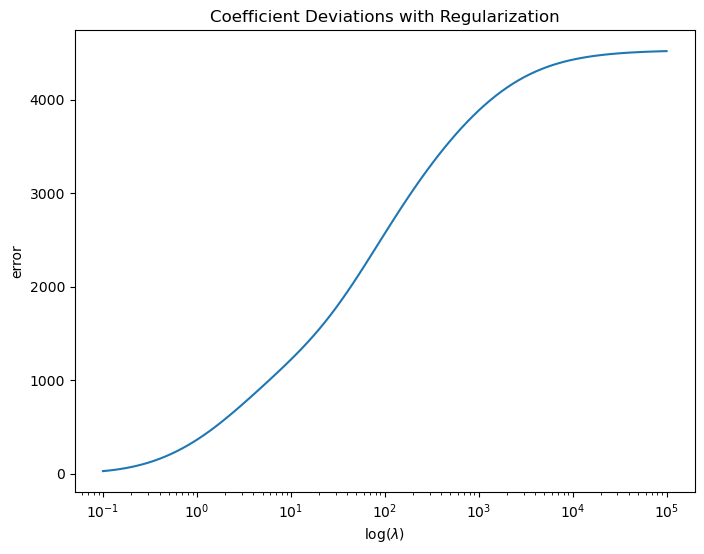

In [23]:
# Hu·∫•n luy·ªán m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh
reg_coeff = linear_model.LinearRegression().fit(X_train, y_train)
# T√≠nh sai s·ªë gi·ªØa h·ªá s·ªë c·ªßa m√¥ h√¨nh Ridge v√† h·ªìi quy tuy·∫øn t√≠nh
errors = [mean_squared_error(linear_model.Ridge(alpha=a).fit(X_train, y_train).coef_, reg_coeff.coef_) for a in alphas]
# V·∫Ω bi·ªÉu ƒë·ªì ƒë·ªÉ so s√°nh s·ª± kh√°c bi·ªát c·ªßa h·ªá s·ªë d·ª±a tr√™n gi√° tr·ªã c·ªßa alpha
plt.figure(figsize=(8, 6))
plt.plot(alphas, errors)
plt.xscale('log')
plt.xlabel("log($\lambda$)")
plt.ylabel("error")
plt.title("Coefficient Deviations with Regularization")
plt.show()

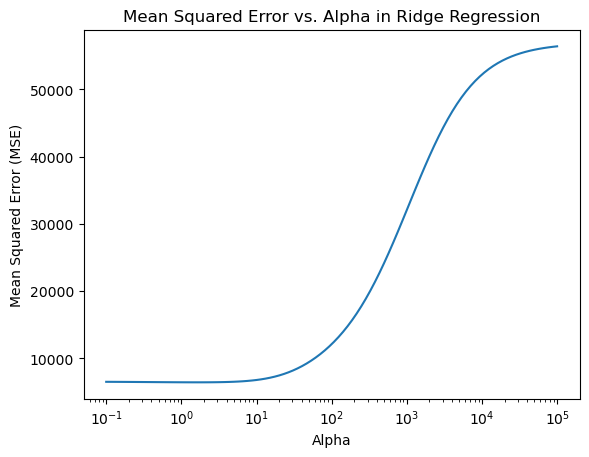

In [24]:
# S·ª≠ d·ª•ng RidgeCV t·ª´ th∆∞ vi·ªán linear_model ƒë·ªÉ th·ª±c hi·ªán ridge regression 
# v·ªõi c√°c gi√° tr·ªã alpha ƒë√£ ƒë∆∞·ª£c x√°c ƒë·ªãnh tr∆∞·ªõc trong m·∫£ng alphas. 
# ƒê·∫∑t store_cv_values=True ƒë·ªÉ l∆∞u tr·ªØ gi√° tr·ªã cross-validated mean squared error (MSE).
reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
# S·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c fit() ƒë·ªÉ ƒë√†o t·∫°o m√¥ h√¨nh ridge tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán X_train v√† y_train.
reg.fit(X_train, y_train)
# L·∫•y tr·ª•c hi·ªán t·∫°i b·∫±ng plt.gca()
ax = plt.gca()
# V·∫Ω bi·ªÉu ƒë·ªì c·ªßa gi√° tr·ªã MSE trung b√¨nh theo ùõº t·ª´ c√°c gi√° tr·ªã cross-validated MSE ƒë√£ l∆∞u tr·ªØ trong reg.cv_values_. 
ax.plot(reg.alphas, reg.cv_values_.mean(axis=0))
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Alpha in Ridge Regression')
plt.show()

In [25]:
# In ra m√†n h√¨nh c√°c th√¥ng tin sau: Best score, Estimated regularization parameter alpha, Training score, Test score
print("Best score:", reg.best_score_)
print("Estimated regularization parameter alpha:", reg.alpha_)
print("Training score:", reg.score(X_train, y_train))
print("Test score:", reg.score(X_test, y_test))

Best score: -6440.0361349914965
Estimated regularization parameter alpha: 1.6297508346206444
Training score: 0.9081942915442122
Test score: 0.8625788494568934


In [27]:
# D·ª± ƒëo√°n cho t·∫≠p hu·∫•n luy·ªán
y_train_pred = reg.predict(X_train)
# T√≠nh RMSE tr√™n t·∫≠p hu·∫•n luy·ªán
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE on training set: {rmse_train}")

RMSE on training set: 71.84011342174607


In [29]:
# D·ª± ƒëo√°n cho t·∫≠p ki·ªÉm tra
y_pred_test = reg.predict(X_test)
# T√≠nh RMSE tr√™n t·∫≠p ki·ªÉm tra
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE on test set: {rmse_test}")

RMSE on test set: 77.40882425615033


In [35]:
# Th√™m m·ªôt h√†ng m·ªõi v√†o DataFrame rmses v·ªõi c√°c gi√° tr·ªã 'Ridge regression', rmse_train v√† rmse_test t∆∞∆°ng ·ª©ng.
rmses.loc[len(rmses)] = ['Ridge regresion', rmse_train, rmse_test]
rmses

name  train_RMSE   test_RMSE
index                                              
0            baseline model  243.882152  180.877011
0          simple alt model  154.992815  138.854544
0        max rainfall model  119.953630  117.437897
0      multi alt rain model  118.095746  113.746363
4             forward model   87.392377  117.884639
5            backward model   87.236023  118.367974
6         mlxtend SFS model   91.976905   91.232370
7           Ridge regresion   71.840113   77.408824

## Final result

In [37]:
print(rmses.columns)


Index(['name', 'train_RMSE', 'test_RMSE'], dtype='object')


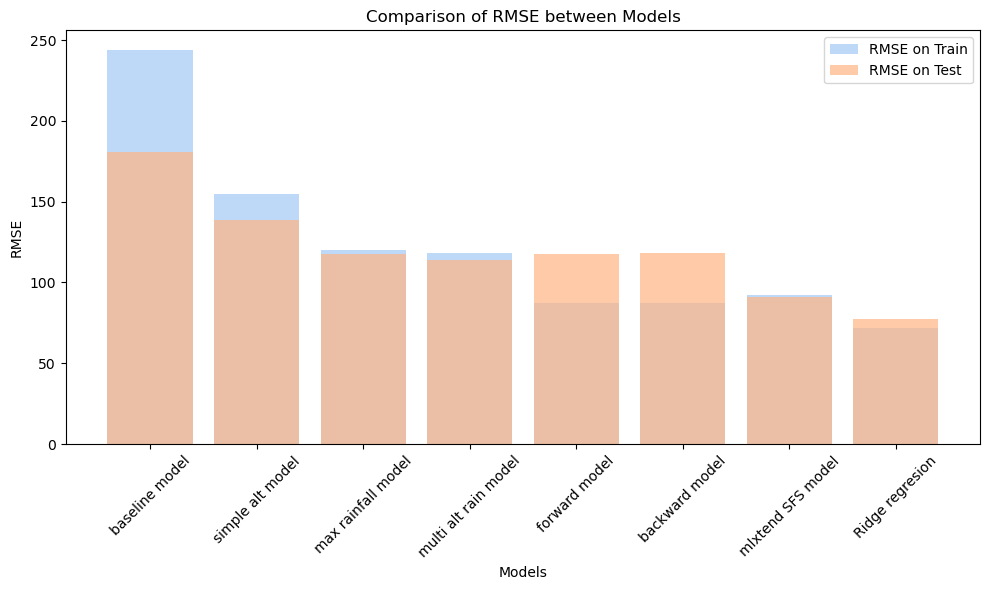

In [41]:
# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh RMSE gi·ªØa c√°c models hu·∫•n luy·ªán 
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))

plt.bar(rmses['name'], rmses['train_RMSE'], alpha=0.7, label='RMSE on Train')
plt.bar(rmses['name'], rmses['test_RMSE'], alpha=0.7, label='RMSE on Test')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE between Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()